In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
#random_forest
from sklearn.ensemble import RandomForestClassifier
#logistic
from sklearn.linear_model import LogisticRegression
#knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
#decision_tree
from sklearn.tree import DecisionTreeClassifier
#bayes
from sklearn.naive_bayes import GaussianNB

In [2]:
dataset2=pd.read_csv(r"C:\FINAL YEAR PROJECT\dataset\dataset2.csv")

In [3]:
dataset1=pd.read_csv(r"C:\FINAL YEAR PROJECT\dataset\new_data.csv")

In [4]:
numerics=LabelEncoder()
dataset1['Sex_n']=numerics.fit_transform(dataset1['Sex'])
dataset1['ChestPainType_n']=numerics.fit_transform(dataset1['ChestPainType'])
dataset1['RestingECG_n']=numerics.fit_transform(dataset1['RestingECG'])
dataset1['ExerciseAngina_n']=numerics.fit_transform(dataset1['ExerciseAngina'])
dataset1['ST_Slope_n']=numerics.fit_transform(dataset1['ST_Slope'])
dataset1=dataset1.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis='columns')

In [5]:
dataset1.head(2)

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_n,ChestPainType_n,RestingECG_n,ExerciseAngina_n,ST_Slope_n
0,0,40,140,289.0,0,172,0.0,0,1,1,1,0,2
1,1,49,160,180.0,0,156,1.0,1,0,2,1,0,1


In [6]:
dataset1=dataset1.iloc[:,1:]

In [7]:
dataset1.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_n,ChestPainType_n,RestingECG_n,ExerciseAngina_n,ST_Slope_n
0,40,140,289.0,0,172,0.0,0,1,1,1,0,2
1,49,160,180.0,0,156,1.0,1,0,2,1,0,1


In [9]:
dataset1.columns=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [10]:
dataset1=dataset1[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]

In [11]:
dataset1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [12]:
dataset1_maxhr_mean=dataset1.MaxHR.mean()
dataset1_maxhr_mean

137.27939464493596

In [13]:
dataset1_maxhr_median=dataset1.MaxHR.median()
dataset1_maxhr_median

139.0

In [14]:
demo_mean=dataset2
demo_mean.loc[demo_mean['MaxHR'] > 1, 'MaxHR'] = 137.27
demo_mean

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,52,1,0,125,212,0,1,137.27,0,1.0,2,0
1,1,53,1,0,140,203,1,0,137.27,1,3.1,0,0
2,2,70,1,0,145,174,0,1,137.27,1,2.6,0,0
3,3,61,1,0,148,203,0,1,137.27,0,0.0,2,0
4,4,62,0,0,138,294,1,1,137.27,0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,1020,59,1,1,140,221,0,1,137.27,1,0.0,2,1
928,1021,60,1,0,125,258,0,0,137.27,1,2.8,1,0
929,1022,47,1,0,110,275,0,0,137.27,1,1.0,1,0
930,1023,50,0,0,110,254,0,0,137.27,0,0.0,2,1


In [16]:
demo_median=dataset2
demo_median.loc[demo_median['MaxHR'] > 1, 'MaxHR'] = 139
demo_median

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,52,1,0,125,212,0,1,139.0,0,1.0,2,0
1,1,53,1,0,140,203,1,0,139.0,1,3.1,0,0
2,2,70,1,0,145,174,0,1,139.0,1,2.6,0,0
3,3,61,1,0,148,203,0,1,139.0,0,0.0,2,0
4,4,62,0,0,138,294,1,1,139.0,0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,1020,59,1,1,140,221,0,1,139.0,1,0.0,2,1
928,1021,60,1,0,125,258,0,0,139.0,1,2.8,1,0
929,1022,47,1,0,110,275,0,0,139.0,1,1.0,1,0
930,1023,50,0,0,110,254,0,0,139.0,0,0.0,2,1


In [17]:
mean_dataset = pd.concat([dataset1, demo_mean])
mean_dataset.shape

(1791, 13)

In [18]:
median_dataset = pd.concat([dataset1, demo_median])
median_dataset.shape

(1791, 13)

# mean


In [38]:
X=mean_dataset[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

In [39]:
Y=mean_dataset[['HeartDisease']]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30,random_state=0)

In [41]:
model_random_forest = RandomForestClassifier(n_estimators=50)
model_random_forest.fit(X_train, Y_train)

C:\Users\sayuj\AppData\Local\Temp\ipykernel_19128\1023120328.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=50)

In [42]:
Y_pred = model_random_forest.predict(X_test)

score :  100
test_score : 88
accuracy : 88.47583643122677


<AxesSubplot:>

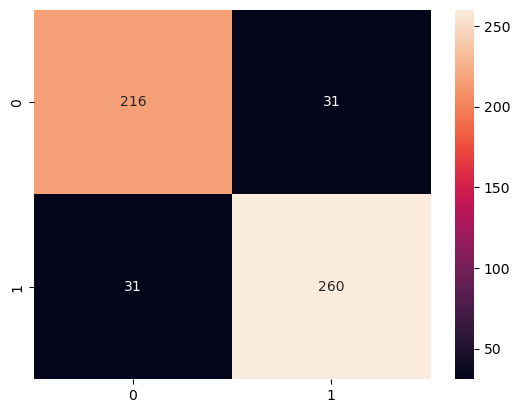

In [43]:
random_forest_score = round(model_random_forest.score(X_train , Y_train)*100)
random_forest_test_score = round(model_random_forest.score(X_test,Y_test)*100)
random_forest_accuracy = accuracy_score(Y_test,Y_pred)*100

print('score : ',random_forest_score)
print('test_score :',random_forest_test_score)
print('accuracy :',random_forest_accuracy)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")

# median

In [44]:
x=median_dataset[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

In [45]:
y=median_dataset[['HeartDisease']]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=0)

In [47]:
model_random_forest = RandomForestClassifier(n_estimators=50)
model_random_forest.fit(x_train, y_train)

C:\Users\sayuj\AppData\Local\Temp\ipykernel_19128\2028873733.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50)

In [48]:
y_pred = model_random_forest.predict(x_test)

score :  100
test_score : 87
accuracy : 86.98884758364312


<AxesSubplot:>

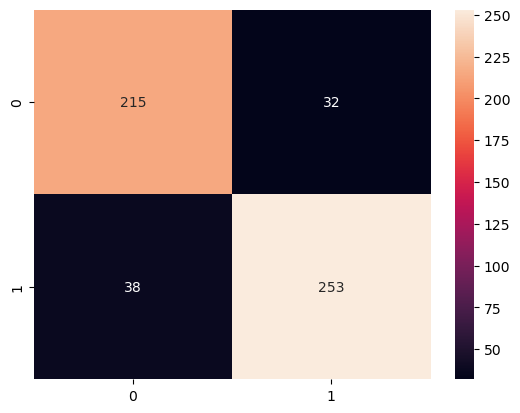

In [49]:
random_forest_score = round(model_random_forest.score(x_train , y_train)*100)
random_forest_test_score = round(model_random_forest.score(x_test,y_test)*100)
random_forest_accuracy = accuracy_score(y_test,y_pred)*100

print('score : ',random_forest_score)
print('test_score :',random_forest_test_score)
print('accuracy :',random_forest_accuracy)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")